<a href="https://colab.research.google.com/github/pks2906/Progcast/blob/main/Multi_organ_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Getting the data into a dataframe and taking a first look
dataset = pd.read_csv('/content/dataset.csv')
dataset.head()

,ISS,NISS,PS14,Age,WBC [109/L]_T1,NEUT [109/L]_T1,LYMPH [109/L]_T1,MONO [109/L]_T1,IG [109/L]_T1,NEUT %_T1,...,Eff_Mem_Cyto_T3,IL1-Ra_T3,IL-6_T3,IL-8_T3,IL-10_T3,G-CSF_T3,MCP-1_T3,TNF-A_T3,Cortisol (ng/ml)_T3,Label
0,11,11,97.21493,41,26.16,21.95,1.60,2.58,0.10,83.9,...,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.6876,N
1,9,22,99.59795,22,8.28,4.21,3.53,0.33,0.04,50.9,...,33.0,237.32,75.04,66.47,59.20,88.73,2.89,39.96,133.6386,Y
2,14,17,99.10462,47,9.24,4.52,3.73,0.45,0.16,49.0,...,NaN,179.18,34.76,58.45,171.43,84.37,0.01,85.15,181.1892,N
3,4,12,99.85114,38,11.54,6.37,4.18,0.65,0.09,55.2,...,38.0,1643.40,1353.66,193.49,2100.26,292.98,646.47,1267.07,194.7159,N
4,24,34,87.32603,78,17.43,12.48,3.46,1.10,0.38,71.7,...,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.6209,Y


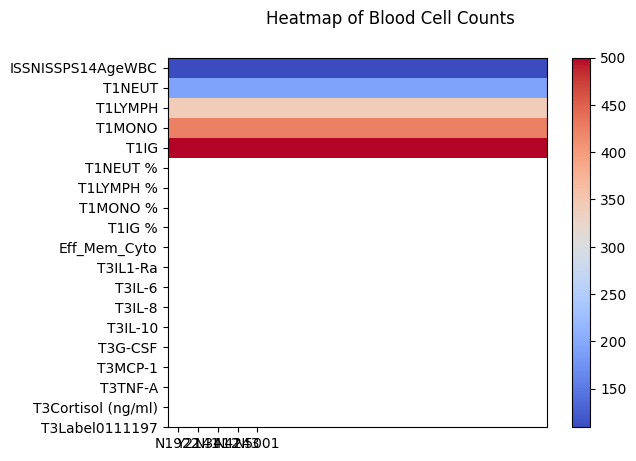

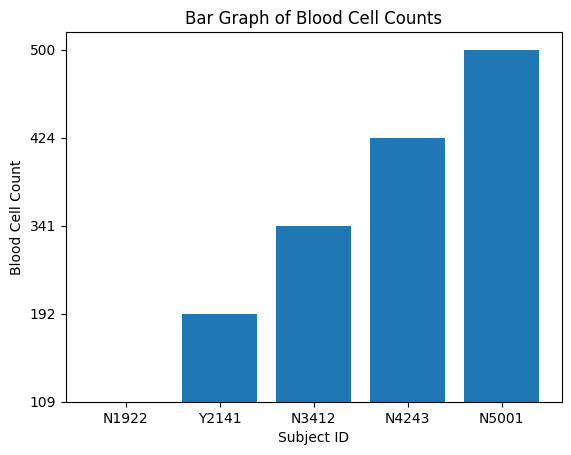

In [ ]:


# Data for the heatmap
data = np.array([
    [109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109],
    [192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192],
    [341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341],
    [424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424, 424],
    [500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
])

# Define the row and column labels
row_labels = ["ISSNISSPS14AgeWBC", "T1NEUT", "T1LYMPH", "T1MONO", "T1IG", "T1NEUT %", "T1LYMPH %", "T1MONO %", "T1IG %", "Eff_Mem_Cyto", "T3IL1-Ra", "T3IL-6", "T3IL-8", "T3IL-10", "T3G-CSF", "T3MCP-1", "T3TNF-A", "T3Cortisol (ng/ml)", "T3Label0111197"]
col_labels = ["N1922", "Y2141", "N3412", "N4243", "N5001"]

# Create the heatmap
plt.imshow(data, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(col_labels)), col_labels)
plt.yticks(range(len(row_labels)), row_labels)
plt.suptitle("Heatmap of Blood Cell Counts")
plt.show()

# Convert the heatmap to a bar graph
target_industries = ["N1922", "Y2141", "N3412", "N4243", "N5001"]
target_user_groups = ["109", "192", "341", "424", "500"]

# Create the bar graph
plt.bar(target_industries, target_user_groups)
plt.xlabel("Subject ID")
plt.ylabel("Blood Cell Count")
plt.title("Bar Graph of Blood Cell Counts")
plt.show()


<Axes: >

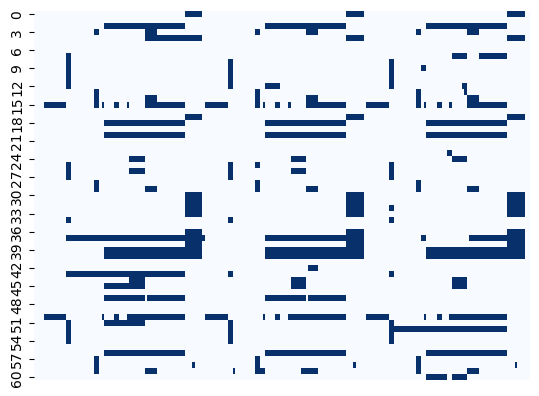

In [ ]:
sns.heatmap(dataset.isnull(), xticklabels = False, cbar = False, cmap = 'Blues')


In [ ]:
dataset.interpolate(method = "linear", limit = 5, inplace = True)

<Axes: >

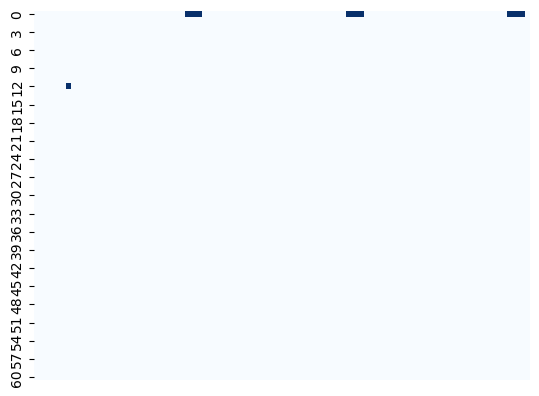

In [ ]:
sns.heatmap(dataset.isnull(), xticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
dataset.interpolate(method = "linear", limit = 5, inplace = True)

In [ ]:
dataset.fillna(0,inplace = True)


<Axes: >

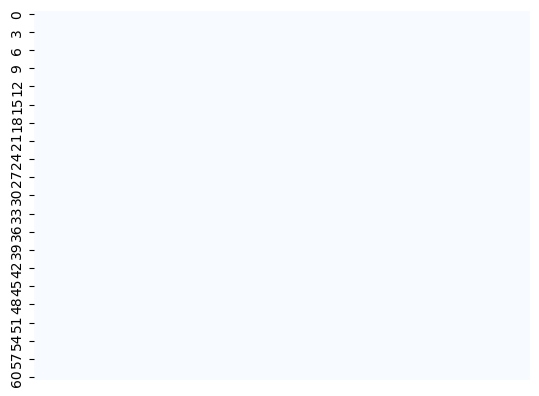

In [ ]:
sns.heatmap(dataset.isnull(), xticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
dataset.dtypes

ISS                      int64
NISS                     int64
PS14                   float64
Age                      int64
WBC [109/L]_T1         float64
                        ...   
G-CSF_T3               float64
MCP-1_T3               float64
TNF-A_T3               float64
Cortisol (ng/ml)_T3    float64
Label                   object
Length: 197, dtype: object

In [ ]:
dataset.isnull().sum()

ISS                    0
NISS                   0
PS14                   0
Age                    0
WBC [109/L]_T1         0
                      ..
G-CSF_T3               0
MCP-1_T3               0
TNF-A_T3               0
Cortisol (ng/ml)_T3    0
Label                  0
Length: 197, dtype: int64

In [ ]:
dataset.interpolate(method = "linear", limit = 5, inplace = True)

<Axes: >

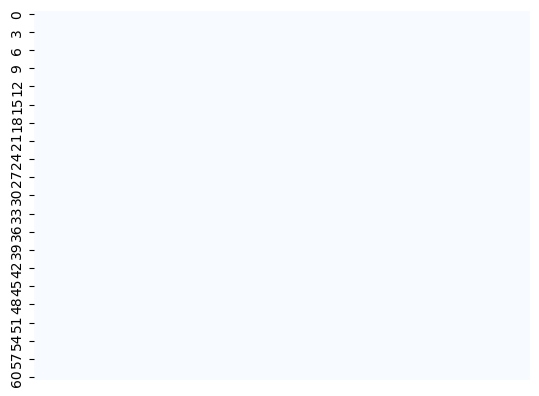

In [ ]:
sns.heatmap(dataset.isnull(), xticklabels = False, cbar = False, cmap = 'Blues')

Training of the First Model


In [ ]:
# Separate the training data from the target data
X = dataset.iloc[:, 0:-1]
y = dataset.loc[:, 'Label']


##Logreg

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4 ,random_state= 0)

# Training the logistic regression model
logreg = LogisticRegression(max_iter = 2500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2500)

Done with the Training part

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
y_pred = logreg.predict(X_test)
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 2))


Test accuracy: 0.64


A baseline accuracy of 64% was achieved, let's see if that score can be improved upon by using other methods.

In [ ]:
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_pred, pos_label='Y')

print("F1 score:", f1)

F1 score: 0.6666666666666665


In [ ]:
#precision

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, pos_label='Y')

print("Precision score:", precision)


Precision score: 0.75


In [ ]:


from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, pos_label='Y')
print("Recall score:", recall)


Recall score: 0.6


In [ ]:


from sklearn.metrics import f1_score

# Calculate the macro average F1 score
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Calculate the weighted average F1 score
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Macro average F1 score:", macro_f1)
print("Weighted average F1 score:", weighted_f1)


Macro average F1 score: 0.6376811594202898
Weighted average F1 score: 0.6434782608695652


AOC ROC

In [ ]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef

In [ ]:
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AOC ROC:", roc_auc)

AOC ROC: 0.7


MCC



In [ ]:
mcc = matthews_corrcoef(y_test, logreg.predict(X_test))
print("MCC:", mcc)

MCC: 0.29417420270727607


Confusion Matrix

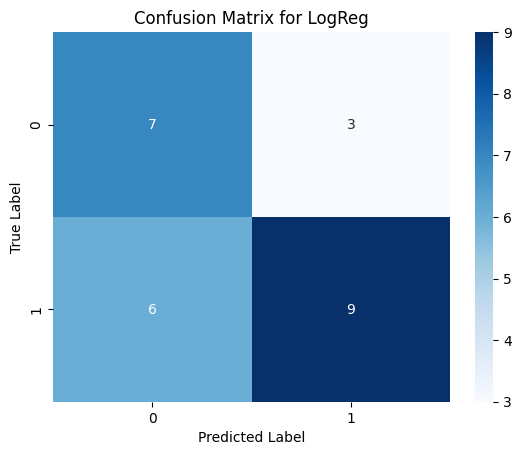

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for LogReg")
plt.show()

##Random Forest

**New Method - Random Forest for the better accruracy and scores**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100,125,150,175,200,250,300,350,400,450,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
import warnings
warnings.filterwarnings('ignore')

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 125, 150, 175, 200, 250, 300,
                                          350, 400, 450, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc=RandomForestClassifier(criterion = 'entropy',
 max_depth = 4,
 max_features = 'log2',
 n_estimators = 125,
random_state=42)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=125, random_state=42)

In [ ]:
pred_f = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred_f))

              precision    recall  f1-score   support

           N       1.00      0.50      0.67        10
           Y       0.75      1.00      0.86        15

    accuracy                           0.80        25
   macro avg       0.88      0.75      0.76        25
weighted avg       0.85      0.80      0.78        25



AOC ROC

In [ ]:



roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])


print("AOC ROC:", roc_auc)


AOC ROC: 0.8600000000000001


MCC



In [ ]:


mcc = matthews_corrcoef(y_test, rfc.predict(X_test))
print("MCC:", mcc)


MCC: 0.6123724356957945


Confusion Matrix

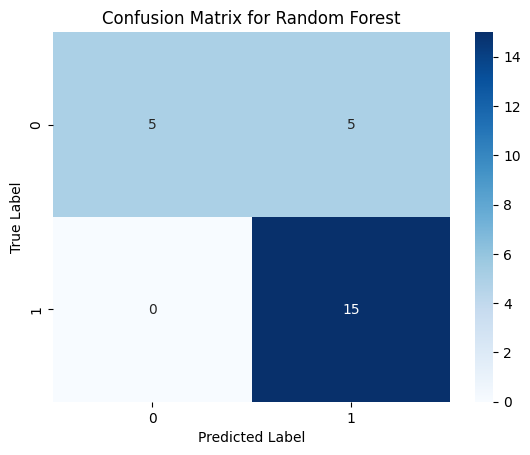

In [ ]:


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, rfc.predict(X_test))


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()


##SVM


In [ ]:


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create the grid search object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Create a new SVC object with the best parameters
best_svm = SVC(**grid_search.best_params_)

# Fit the best SVM object to the data
best_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = best_svm.predict(X_test)

# Evaluate the performance of  SVM model
print(classification_report(y_test, y_pred_svm))


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           N       0.57      0.80      0.67        10
           Y       0.82      0.60      0.69        15

    accuracy                           0.68        25
   macro avg       0.69      0.70      0.68        25
weighted avg       0.72      0.68      0.68        25



AOC ROC

In [ ]:
from sklearn.svm import SVC

# Create a new SVM model with probability enabled
best_svm = SVC(C=0.1, gamma=1, kernel='linear', probability=True)

# Fit the model to the training data
best_svm.fit(X_train, y_train)

# Calculate the AOC ROC for the best SVM model
roc_auc_svm = roc_auc_score(y_test, best_svm.predict_proba(X_test)[:, 1])

# Print the AOC ROC
print("AOC ROC SVM model:", roc_auc_svm)

AOC ROC SVM model: 0.8066666666666666


MCC


In [ ]:

mcc_svm = matthews_corrcoef(y_test, best_svm.predict(X_test))

# Print the MCC
print("MCC SVM model:", mcc_svm)


MCC SVM model: 0.39477101697586137


Confusion Matrix

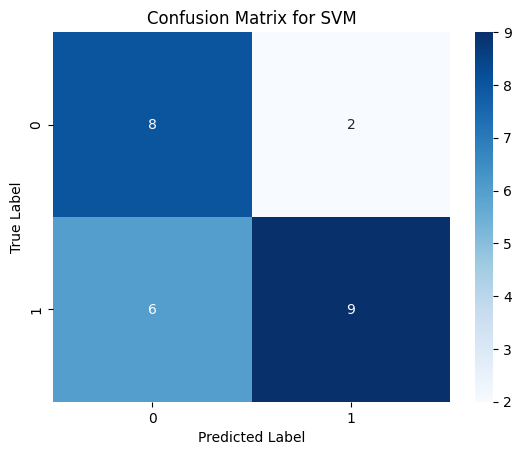

In [ ]:


import matplotlib.pyplot as plt
# Create a confusion matrix for the best SVM model
cm_svm = confusion_matrix(y_test, best_svm.predict(X_test))

# Plot the confusion matrix
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM")
plt.show()


##KNeighborsClassifier

In [ ]:


from sklearn.neighbors import KNeighborsClassifier

# Create the kNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Create a new kNN object with the best parameters
best_knn = KNeighborsClassifier(**grid_search.best_params_)

# Fit the best kNN object to the data
best_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = best_knn.predict(X_test)

# Evaluate the performance of the best kNN model
print(classification_report(y_test, y_pred_knn))


{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
              precision    recall  f1-score   support

           N       0.60      0.60      0.60        10
           Y       0.73      0.73      0.73        15

    accuracy                           0.68        25
   macro avg       0.67      0.67      0.67        25
weighted avg       0.68      0.68      0.68        25



In [ ]:



roc_auc_knn = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])


print("AOC ROC kNN model:", roc_auc_knn)

# MCC
mcc_knn = matthews_corrcoef(y_test, best_knn.predict(X_test))


print("MCC kNN model:", mcc_knn)


AOC ROC kNN model: 0.79
MCC kNN model: 0.3333333333333333


Confusion Matrix

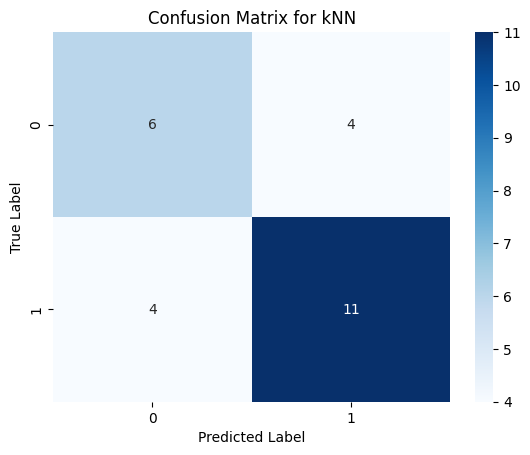

In [ ]:
import matplotlib.pyplot as plt
# Create a confusion matrix for the best kNN model
cm_knn = confusion_matrix(y_test, best_knn.predict(X_test))

# Plot the confusion matrix
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for kNN")
plt.show()


##AdaBoost Classifier & Bagging Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

# Create an AdaBoost classifier
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=50,
                         learning_rate=1)

# Fit the AdaBoost classifier to the data
abc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_abc = abc.predict(X_test)

# Evaluate the performance of the AdaBoost classifier
print(classification_report(y_test, y_pred_abc))

# Create a Bagging classifier
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=50,
                        max_samples=0.25,
                        bootstrap=False)

# Fit the Bagging classifier to the data
bc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bc = bc.predict(X_test)

# Evaluate the performance of the Bagging classifier
print(classification_report(y_test, y_pred_bc))


              precision    recall  f1-score   support

           N       0.67      0.60      0.63        10
           Y       0.75      0.80      0.77        15

    accuracy                           0.72        25
   macro avg       0.71      0.70      0.70        25
weighted avg       0.72      0.72      0.72        25

              precision    recall  f1-score   support

           N       1.00      0.60      0.75        10
           Y       0.79      1.00      0.88        15

    accuracy                           0.84        25
   macro avg       0.89      0.80      0.82        25
weighted avg       0.87      0.84      0.83        25



In [ ]:
# AOC ROC for AdaBoost
roc_auc_abc = roc_auc_score(y_test, abc.predict_proba(X_test)[:, 1])
print("AOC ROC AdaBoost model:", roc_auc_abc)

# MCC for AdaBoost
mcc_abc = matthews_corrcoef(y_test, abc.predict(X_test))
print("MCC AdaBoost model:", mcc_abc)

# AOC ROC for Bagging
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test)[:, 1])
print("AOC ROC Bagging model:", roc_auc_bc)

# MCC for Bagging
mcc_bc = matthews_corrcoef(y_test, bc.predict(X_test))
print("MCC Bagging model:", mcc_bc)
# AOC ROC for AdaBoost
roc_auc_abc = roc_auc_score(y_test, abc.predict_proba(X_test)[:, 1])
print("AOC ROC AdaBoost model:", roc_auc_abc)

# MCC for AdaBoost
mcc_abc = matthews_corrcoef(y_test, abc.predict(X_test))
print("MCC AdaBoost model:", mcc_abc)

# AOC ROC for Bagging
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test)[:, 1])
print("AOC ROC Bagging model:", roc_auc_bc)

# MCC for Bagging
mcc_bc = matthews_corrcoef(y_test, bc.predict(X_test))
print("MCC Bagging model:", mcc_bc)


AOC ROC AdaBoost model: 0.7000000000000001
MCC AdaBoost model: 0.40824829046386296
AOC ROC Bagging model: 0.8166666666666667
MCC Bagging model: 0.6882472016116853


Confusion Matrix

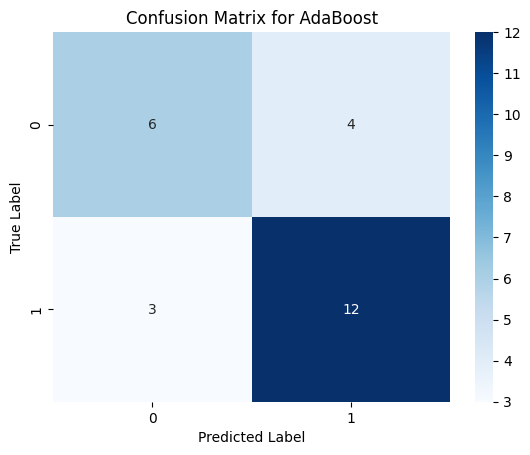

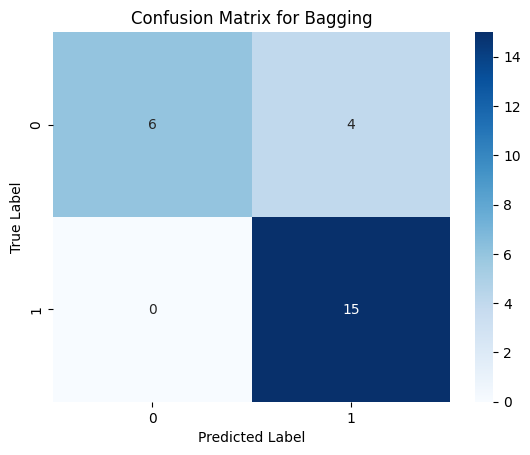

In [ ]:
import matplotlib.pyplot as plt
# Confusion Matrix for AdaBoost
cm_abc = confusion_matrix(y_test, abc.predict(X_test))

# Plot the confusion matrix
sns.heatmap(cm_abc, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for AdaBoost")
plt.show()

# Confusion Matrix for Bagging
cm_bc = confusion_matrix(y_test, bc.predict(X_test))

# Plot the confusion matrix
sns.heatmap(cm_bc, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Bagging")
plt.show()


##Visual Representation of accuracy of all model used through linear graph

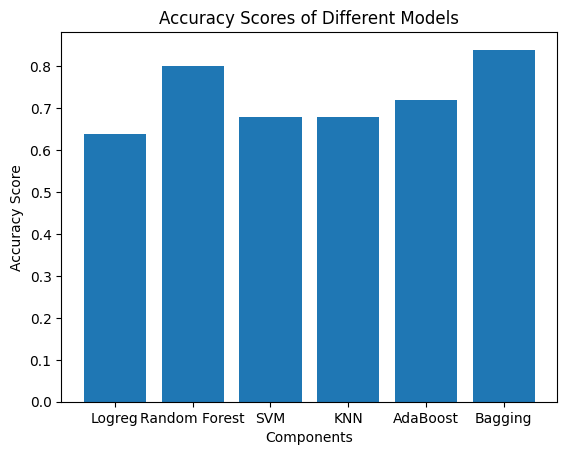

In [ ]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Remove non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns
dataset.drop(non_numeric_columns, axis=1, inplace=True)

# Convert non-numeric values to numeric values
for column in dataset.columns:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

# Define features and values
features = dataset.columns
values = []
for feature in features:
    values.append(dataset[feature].mean())

# Create and display the bar chart
plt.figure(figsize=(130, 50))  # Adjust figure size as needed
bars = plt.bar(features, values)
plt.xlabel('Features', fontsize=70)  # Increase font size for x-axis label
plt.ylabel('Values', fontsize=110)  # Increase font size for y-axis label
plt.title('Representation of all features of the data set', fontsize=70)  # Increase font size for title
plt.xticks(rotation=90, ha='right', fontsize=40)  # Rotate x-axis labels, align to the right, and increase font size
plt.yticks(fontsize=40)  # Increase font size for y-axis ticks
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Remove non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns
dataset.drop(non_numeric_columns, axis=1, inplace=True)

# Convert non-numeric values to numeric values
for column in dataset.columns:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

# Define features and values
features = dataset.columns
values = []
for feature in features:
    values.append(dataset[feature].mean())

# Create and display the line plot
plt.figure(figsize=(130, 50))  # Adjust figure size as needed
plt.plot(features, values, marker='o', linestyle='-', markersize=12, linewidth=4, color='blue')  # Increase marker size and line width, change color
plt.xlabel('Features', fontsize=70)  # Increase font size for x-axis label
plt.ylabel('Values', fontsize=110)  # Increase font size for y-axis label
plt.title('Representation of all features of the data set', fontsize=20)  # Increase font size for title
plt.xticks(rotation=90, fontsize=40)  # Rotate x-axis labels and increase font size
plt.yticks(fontsize=40)  # Increase font size for y-axis ticks
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
